# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

## 0. Library and data import

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('recipe_site_traffic_2212.csv')
df.head(10)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN
5,6,691.15,3.46,1.65,53.93,One Dish Meal,2,High
6,7,183.94,47.95,9.75,46.71,Chicken Breast,4,NaN
7,8,299.14,3.17,0.40,32.40,Lunch/Snacks,4,NaN
8,9,538.52,3.78,3.37,3.79,Pork,6,High
9,10,248.28,48.54,3.99,113.85,Chicken,2,NaN


## 1. Data exploration and Validation

In [3]:
df.tail()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
942,943,1161.00,5.31,22.39,44.22,Lunch/Snacks,2,NaN
943,944,NaN,NaN,NaN,NaN,Potato,2,High
944,945,951.74,29.42,3.57,13.87,Pork,2,High
945,946,266.61,35.77,0.97,8.07,Potato,6,High
946,947,184.56,45.21,6.20,0.03,Beverages,4,NaN


In [4]:
# Let's see some basic info, like the number of rows, columns and data type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


There are 947 rows and 8 columns. 

Column servings is strangly of Dtype object, while it should be integer or float.

In [5]:
# Let's see the statistics of the numerical columns
df.describe()

,recipe,calories,carbohydrate,sugar,protein
count,947.000000,895.000000,895.000000,895.000000,895.000000
mean,474.000000,435.939196,35.069676,9.046547,24.149296
std,273.519652,453.020997,43.949032,14.679176,36.369739
min,1.000000,0.140000,0.030000,0.010000,0.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000
50%,474.000000,288.550000,21.480000,4.550000,10.800000
75%,710.500000,597.650000,44.965000,9.800000,30.200000
max,947.000000,3633.160000,530.420000,148.750000,363.360000


In [6]:
# Let's check the amount of missing values per column
df.isna().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

In [7]:
# Let's see what is going on with the categorical columns
for i in ['category', 'high_traffic']:
    print(df[i].value_counts())

category
Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: count, dtype: int64
high_traffic
High    574
Name: count, dtype: int64


I see few problems so far:

1. servings is of type object, but it should be int64
2. Nutritional columns (calories, carbohydrate, sugar and protein), have 52 missings values. Seems that they are missing in pairs, all together per recipe. 
3. high_traffic column has 373 missing values. Given that there are only High values, I assume that the missing values are Low.

Let's work on this.

In [8]:
# 1.0 Let's first ensure that there are no duplicate values, ie. 'recipe' values are unique (verification step)
df['recipe'].is_unique

True

In [9]:
# 1.1 Convert 'servings' to numeric, handling parsing issues with coercion

df['servings'] = pd.to_numeric(df['servings'], errors='coerce')
df['servings'].isnull().sum()  # Check if any parsing issues occurred

3

Now, I see that before this where servings had 0 NaN values, it was an artefact because it was not processed as numerical column.

Now there are 3 NaN values, out of 947 values, which is like 0.3%, so we can remove those completely. Let's check those.

In [10]:
df[df.servings.isnull()]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
451,452,1542.53,14.73,5.71,29.92,Lunch/Snacks,NaN,High
548,549,1440.69,30.59,5.78,30.63,Lunch/Snacks,NaN,High
735,736,513.75,65.87,18.63,18.39,Lunch/Snacks,NaN,NaN


2 of those records are of High traffic. We can just drop these values, as there are only 3 values, as we'll do some metrics of calories per serving (meaning division by serving). 

In case, we can just approximate these serving values from the rest but grouped by calories and category.

In [11]:
df = df.dropna(subset=['servings'])

In [12]:
# 1.3 Filling missing values in 'high_traffic' with 'Low' and converting to categorical
df['high_traffic'].fillna('Low', inplace=True)
df['high_traffic'] = df['high_traffic'].astype('category')

/var/folders/w8/7gx9gpgs2f100f60dwx7tbfm0000gn/T/ipykernel_56051/2180008302.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['high_traffic'].fillna('Low', inplace=True)


**1.2 Dealing with missing values in nutritional columns**

Most common way to replace missing numerical values is to assing the median value of the column. But as the data has a mixture of values for different categories of food, as well as, different amount of servings, we should maybe use median value per category and serving. 

But maybe this is not as important for the task of this study, which is to predict recipes that will have a high traffic. So we must first explore the data with EDA.

**Update after first training** We'll fill NaN values in the nutrients from madian values per category and check if the model performs better.

In [13]:
# Fill NaN values in 'calories', 'protein', 'sugar', 'carbohydrate' columns with the mean value for each category
df['calories'] = df.groupby('category')['calories'].transform(lambda x: x.fillna(x.mean()))
df['protein'] = df.groupby('category')['protein'].transform(lambda x: x.fillna(x.mean()))
df['sugar'] = df.groupby('category')['sugar'].transform(lambda x: x.fillna(x.mean()))
df['carbohydrate'] = df.groupby('category')['carbohydrate'].transform(lambda x: x.fillna(x.mean()))

1.4 Feature design - Calories per serving

As we can see from the figure bellow about the distribution of calories per recipe, we see that some recipes have a lot of calories. Given that there is an information of serving per recipe, a logical solution would be to create a feature that would be calories per serving.

In [14]:
# Calculate calories per serving
df['calories_per_serving'] = df['calories'] / df['servings']

In [15]:
# Last check - Let's check the amount of missing values per column
df.isna().sum()

recipe                  0
calories                0
carbohydrate            0
sugar                   0
protein                 0
category                0
servings                0
high_traffic            0
calories_per_serving    0
dtype: int64

## 2. Exploratory Data Analysis (EDA)

Let's do a single-variable chart, for example of column calories

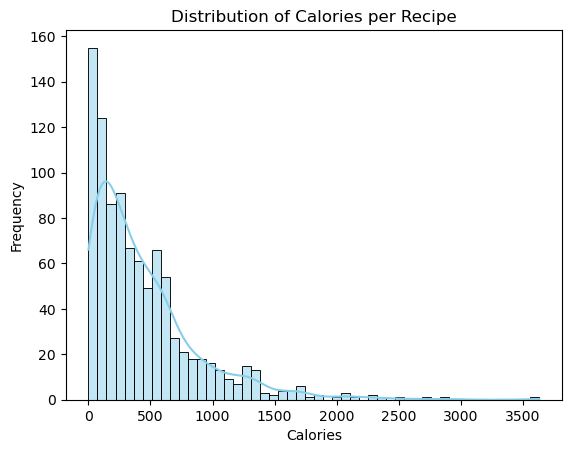

In [16]:
sns.histplot(df['calories'], kde=True, bins=50, color="skyblue")
plt.title('Distribution of Calories per Recipe')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

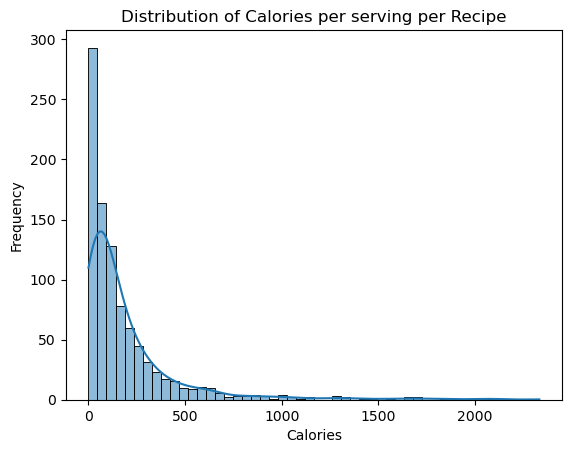

In [17]:
## Let's check this for calories per serving
sns.histplot(df['calories_per_serving'], kde=True, bins=50)
plt.title('Distribution of Calories per serving per Recipe')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

This makes much more sense, even though there are some probable anomalies (more than 1500kcal per serving seams too much), these could be issues with data precision, so they might be cleaned or removed. 

There could be 2 issues causing this: 
 - Calories information is incorrect
 - Serving information is incorrect
  
Let's check those

In [18]:
df[df['calories_per_serving'] > 1500]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic,calories_per_serving
17,18,1695.82,0.10,0.39,33.17,Meat,1.0,High,1695.82
49,50,1724.25,45.52,0.07,49.37,Breakfast,1.0,High,1724.25
55,56,2122.24,25.99,0.52,81.37,Pork,1.0,High,2122.24
147,148,1568.00,15.49,5.23,53.23,Chicken,1.0,Low,1568.00
292,293,1878.82,0.80,7.60,89.01,Chicken Breast,1.0,High,1878.82
418,419,1830.28,3.92,1.83,44.74,Chicken Breast,1.0,High,1830.28
428,429,1646.83,101.11,2.77,14.87,Meat,1.0,High,1646.83
566,567,1635.46,35.00,9.39,42.13,Pork,1.0,Low,1635.46
636,637,2029.33,25.08,0.61,54.00,One Dish Meal,1.0,High,2029.33
781,782,2068.07,34.23,1.46,10.02,Potato,1.0,High,2068.07


We see that almost all (9 out of 11) are High traffic recipes, so they are important for the model training.
We can see that all the recipes have 1 serving, which probably indicates that this is a data precision issue. This can be addressed with more information about the recipes, or replacing calories per servings with average value per category.


Let's check correlations between servings and calories per serving.

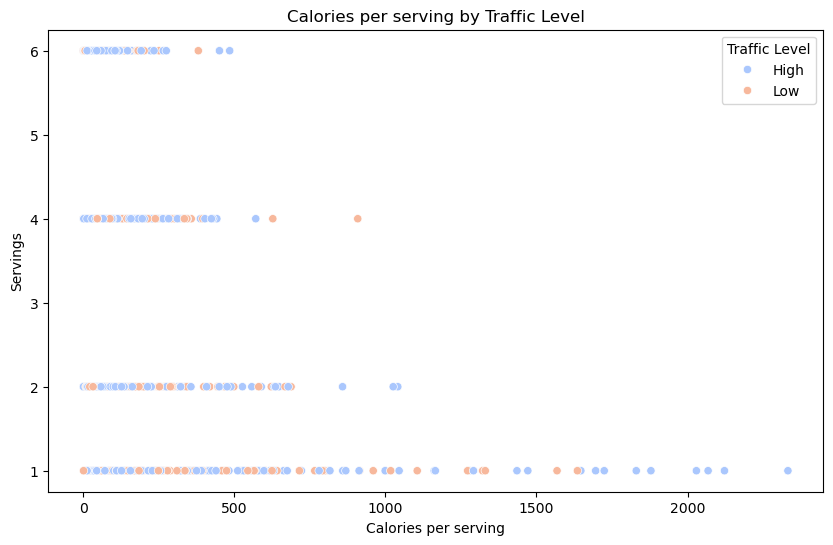

In [19]:
# Multi-Variable Visualization: Calories vs. Carbohydrates with Traffic Level Hue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='calories_per_serving', y='servings', hue='high_traffic', palette='coolwarm')
plt.title('Calories per serving by Traffic Level')
plt.xlabel('Calories per serving')
plt.ylabel('Servings')
plt.legend(title='Traffic Level')
plt.show()

To address calories imprecision, we can sum up the calories from nutrients information, but the issue is that we have no information about the amount of fat. This we can investiage if we recalculate grams of fat from given 

Online searching we can see that:
- 1g of carbohydrates is 4kcal
- 1g of proteins is 4kcal
- 1g of fat is 9kcal

I can work further on this if I have time...

Let's check ranking per category (another single-variable analysis)

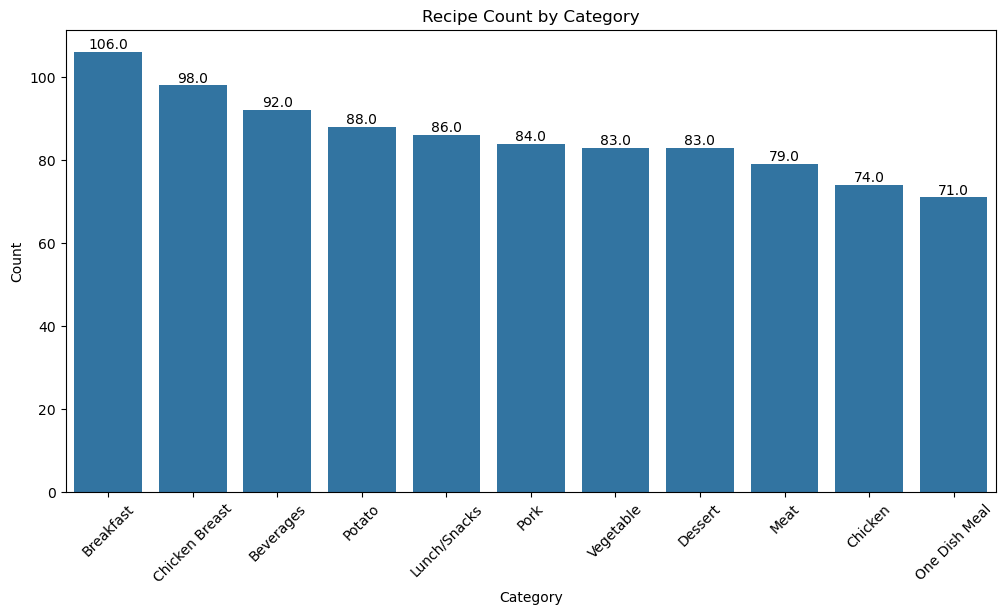

In [20]:
# Bar plot of 'category' to observe frequency of each category
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='category', data=df, order=df['category'].value_counts().index)

# I will also annotate bars with counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Recipe Count by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Now, let's take a look at more variable by adding high traffic. We will keep the ranking of count of recipes in the dataset, but we will add partition of each bar by the count of High traffic and also we will add % of High traffic at the end of each bar

/var/folders/w8/7gx9gpgs2f100f60dwx7tbfm0000gn/T/ipykernel_56051/2753272172.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_traffic_counts = df.groupby(['category', 'high_traffic']).size().unstack(fill_value=0)


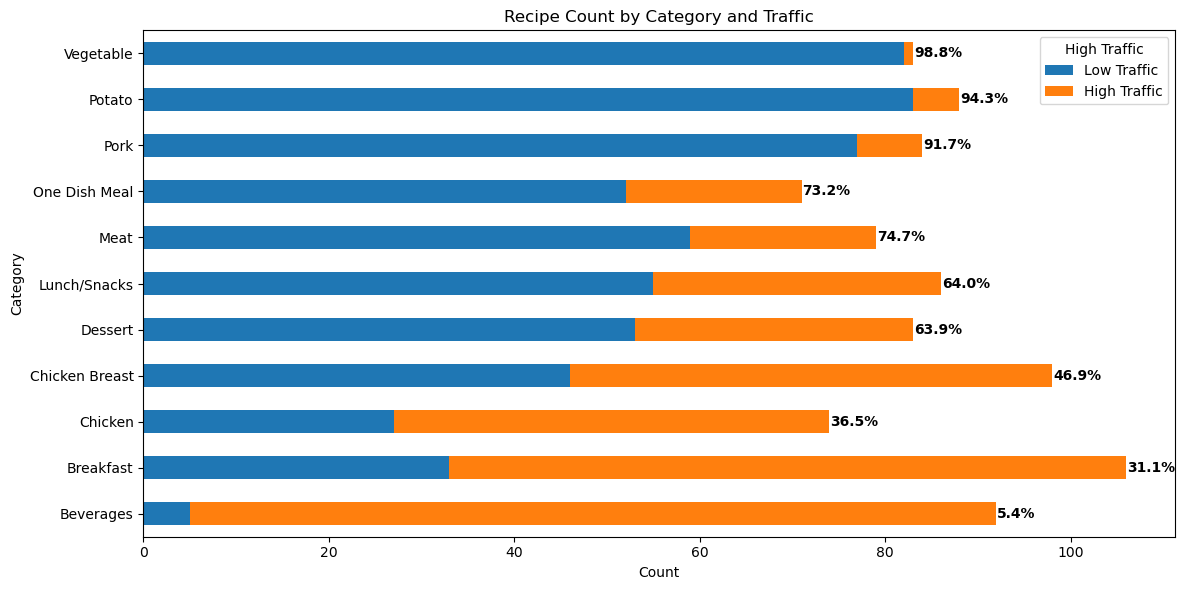

In [21]:
# Calculate counts for each category and high_traffic combination
category_traffic_counts = df.groupby(['category', 'high_traffic']).size().unstack(fill_value=0)

# Calculate total counts and percentage of high traffic for each category
category_traffic_counts['Total'] = category_traffic_counts.sum(axis=1)
category_traffic_counts['% High'] = (category_traffic_counts['High'] / category_traffic_counts['Total'] * 100).round(1)

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each traffic type as a separate bar
category_traffic_counts[['High','Low']].plot(kind='barh', stacked=True, color=['#1f77b4', '#ff7f0e'], ax=ax)
ax.set_xlabel('Count')
ax.set_ylabel('Category')
plt.title('Recipe Count by Category and Traffic')

# Add percentage annotations
for i, (count_0, count_1, total, pct_high) in enumerate(category_traffic_counts.itertuples(index=False)):
    ax.text(count_0 + count_1 + 0.1, i, f'{pct_high}%', va='center', color='black', fontweight='bold')

plt.legend(title='High Traffic', labels=['Low Traffic', 'High Traffic'])
plt.tight_layout()
plt.show()

Seems that some categories have high count of recipes but dont rank as high with High traffic, while some categories have very high traffic per recipe (90% or more)

Given that some categories rank high with traffice, we'll check category and calories per serving vs high traffic. Our hypothesis is that maybe healthy recipes would rank high.

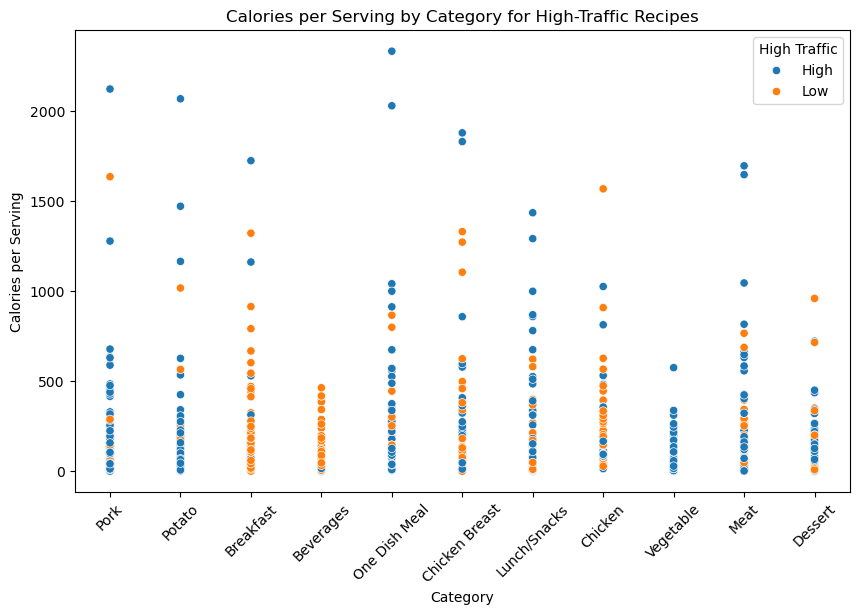

In [22]:
# Filter for high-traffic recipes
high_traffic_df = df[df['high_traffic'] == 'High']

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='category', y='calories_per_serving', hue='high_traffic', data=df)

# Customize the plot
plt.title('Calories per Serving by Category for High-Traffic Recipes')
plt.xlabel('Category')
plt.ylabel('Calories per Serving')
plt.xticks(rotation=45)
plt.legend(title='High Traffic')

plt.show()

This doesn't seem to be the case, or at least it is not clearly visible from this chart. Probably the correlation is more complex. Let's check correlation of each column with high traffic column.

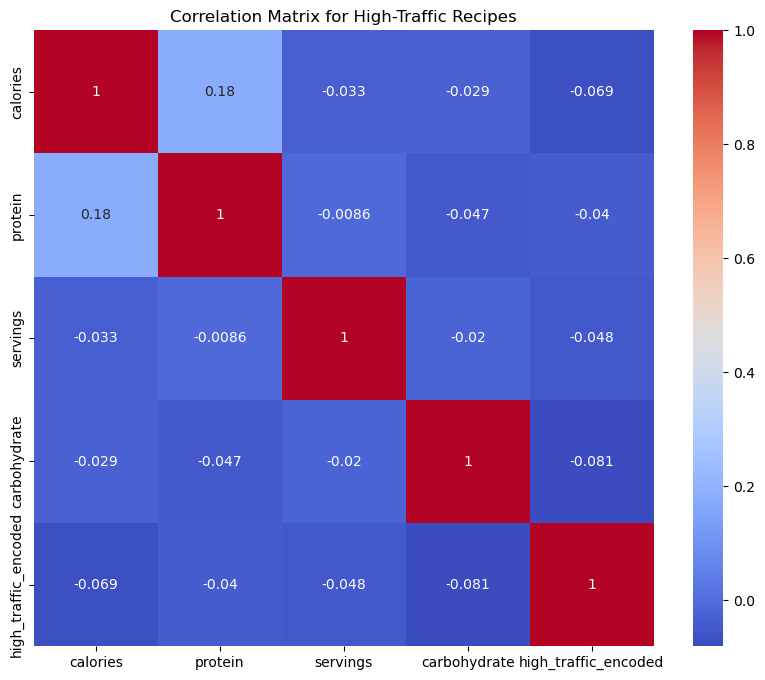

In [36]:
from sklearn.preprocessing import LabelEncoder

# Encode the high_traffic column so it can be plotted
le = LabelEncoder()
df['high_traffic_encoded'] = le.fit_transform(df['high_traffic'])

# Create a correlation matrix
corr_matrix = df[['calories', 'protein', 'servings', 'carbohydrate', 'high_traffic_encoded']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for High-Traffic Recipes')
plt.show()

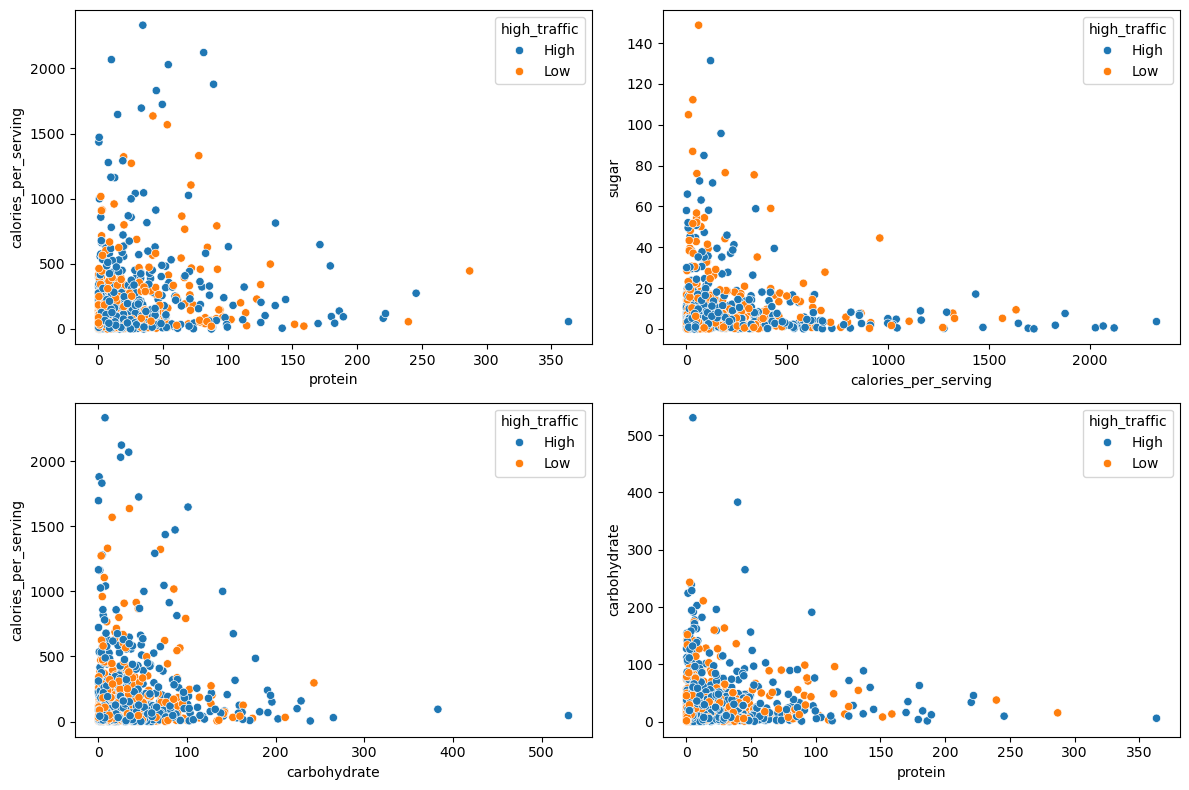

In [24]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot correlations
sns.scatterplot(x='protein', y='calories_per_serving', hue='high_traffic', data=df, ax=axes[0, 0])
sns.scatterplot(x='calories_per_serving',y ='sugar', hue='high_traffic', data=df, ax=axes[0, 1])
sns.scatterplot(x='carbohydrate', y='calories_per_serving', hue='high_traffic', data=df, ax=axes[1, 0])
sns.scatterplot(x='protein', y='carbohydrate', hue='high_traffic', data=df, ax=axes[1, 1])

plt.tight_layout()
plt.show()

We dont see much of a clear correlation between columns (correlation coefficient are low) and there are no clear groups of recipes from correlation charts.

Findings:

- seems that relationship is more complex and that probably more complex models will perform better.
- seems that the category is important factor, so we must use it in the training. As it is categorical feature, we must encode it.

## 3. Model development

As the task is to predict whether a recipe will receive high traffic based on its attributes, the problem is a binary classification task. We'll aim to develop a model that maximizes accuracy for identifying popular recipes. We'll target 80% popularity prediction by minimizing false positives (showing unpopular recipes as popular).

### Model Selection
I am considering 2 options, a simple and a more complex one, that we will try consecutevly.
- **Logistic Regression**: As a simple and often effective in binary classification tasks and allows for clear insight into feature importance.
- **Random Forest Classifier**: For a more complex interactions between features, RFC generally provides strong classification performance, especially when the feature relationships may be non-linear.

In [25]:
# Let's first import necessary libraries for model development and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, classification_report, f1_score, recall_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [26]:
# Data Preparation
# Separate features and target
X = df.drop(columns=['high_traffic', 'calories_per_serving'])
y = df['high_traffic']

# Encode the target variable (high_traffic)
le = LabelEncoder()
y = le.fit_transform(y)

# Define columns for transformations
numeric_features = ['calories', 'carbohydrate', 'sugar', 'protein', 'servings']
categorical_features = ['category']

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [27]:
# Define models
# 1. Baseline Model: Logistic Regression
log_reg = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', LogisticRegression(max_iter=5000))])

# 2. Comparison Model: Random Forest Classifier
rand_forest = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=100))])

# Fit the models
log_reg.fit(X_train, y_train)
rand_forest.fit(X_train, y_train)

# Predict and evaluate
log_reg_preds = log_reg.predict(X_test)
rand_forest_preds = rand_forest.predict(X_test)

# Model Evaluation: Use Precision as the primary metric
log_reg_precision = precision_score(y_test, log_reg_preds)
rand_forest_precision = precision_score(y_test, rand_forest_preds)

# Detailed classification report
log_reg_report = classification_report(y_test, log_reg_preds, target_names=['High Traffic', 'Low Traffic'])
rand_forest_report = classification_report(y_test, rand_forest_preds, target_names=['High Traffic','Low Traffic'])

# Output precision and classification reports
log_reg_precision, rand_forest_precision, log_reg_report, rand_forest_report

(0.6904761904761905,
 0.6385542168674698,
 '              precision    recall  f1-score   support\n\nHigh Traffic       0.85      0.77      0.81       115\n Low Traffic       0.69      0.78      0.73        74\n\n    accuracy                           0.78       189\n   macro avg       0.77      0.78      0.77       189\nweighted avg       0.79      0.78      0.78       189\n',
 '              precision    recall  f1-score   support\n\nHigh Traffic       0.80      0.74      0.77       115\n Low Traffic       0.64      0.72      0.68        74\n\n    accuracy                           0.73       189\n   macro avg       0.72      0.73      0.72       189\nweighted avg       0.74      0.73      0.73       189\n')

## 4. Model Evaluation

The task is to have 80% precision. As the encoder, encoded High as 0 and Low as 1, we need to decode this before doing evaluation.

In [28]:
# Decode predictions back to original labels
log_reg_preds_decoded = le.inverse_transform(log_reg_preds)
rand_forest_preds_decoded = le.inverse_transform(rand_forest_preds)
y_test_decoded = le.inverse_transform(y_test)

In [29]:
# Model Evaluation: Precision and F1-score, targeting label 0 ("High Traffic")
log_reg_precision = precision_score(y_test, log_reg_preds, pos_label=0)
rand_forest_precision = precision_score(y_test, rand_forest_preds, pos_label=0)

# Detailed classification reports using decoded labels
log_reg_report = classification_report(y_test_decoded, log_reg_preds_decoded, target_names=le.classes_)
rand_forest_report = classification_report(y_test_decoded, rand_forest_preds_decoded, target_names=le.classes_)

# Print results
print("Logistic Regression Precision (High Traffic):", log_reg_precision)
print("Random Forest Precision (High Traffic):", rand_forest_precision)

print("\nClassification Report for Logistic Regression:\n", log_reg_report)
print("\nClassification Report for Random Forest Classifier:\n", rand_forest_report)

# Calculate F1-scores for both models
log_reg_f1 = f1_score(y_test, log_reg_preds)
rand_forest_f1 = f1_score(y_test, rand_forest_preds)

# Print F1-scores
print("Logistic Regression F1-score:", log_reg_f1)
print("Random Forest Classifier F1-score:", rand_forest_f1)


Logistic Regression Precision (High Traffic): 0.8476190476190476
Random Forest Precision (High Traffic): 0.8018867924528302

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

        High       0.85      0.77      0.81       115
         Low       0.69      0.78      0.73        74

    accuracy                           0.78       189
   macro avg       0.77      0.78      0.77       189
weighted avg       0.79      0.78      0.78       189


Classification Report for Random Forest Classifier:
               precision    recall  f1-score   support

        High       0.80      0.74      0.77       115
         Low       0.64      0.72      0.68        74

    accuracy                           0.73       189
   macro avg       0.72      0.73      0.72       189
weighted avg       0.74      0.73      0.73       189

Logistic Regression F1-score: 0.7341772151898734
Random Forest Classifier F1-score: 0.6751592356687898


**Conclusion** Logical regrassion model performed with 83% precision, meaning that in 83% of cases it will accurately predict a recipe with a High traffic. Strangly, Random Forest had only 0.74 for High precision. As running the code few times give different values means that we need more data for RF to perform better.

## 5. Business Metrics

To align model performance with business goals, we’ll use metrics that quantify the value of accurately predicting popular recipes, as well as the cost of incorrectly promoting unpopular ones.

- Precision for Popular Recipes: Measures the percentage of recipes predicted as popular that truly are popular. High precision minimizes the risk of showing unpopular recipes, which can detract from user experience and lead to lower engagement.
- Recall for Popular Recipes: Reflects the percentage of all truly popular recipes that the model successfully identifies. High recall ensures that the model captures a broad range of popular recipes, increasing potential engagement.

F1 score is a combination of precision and recall, and it is a very good business metric, but we can try to develop a similar metric giving more weigth on precision.

Business Metric - Popular Recipe Conversion Rate (PRCR): A custom metric based on Precision and Recall. We define PRCR as:
    
    PRCR=0.7×Precision+0.3×Recall

This weighted metric places greater emphasis on precision, reflecting the business priority to avoid recommending unpopular recipes.

In [30]:
# Function to calculate Popular Recipe Conversion Rate (PRCR)
def calculate_prcr(precision, recall, precision_weight=0.7, recall_weight=0.3):
    return precision_weight * precision + recall_weight * recall

# Model Predictions and Metrics Calculation
# Logistic Regression metrics
log_reg_precision = precision_score(y_test, log_reg_preds, pos_label=0)
log_reg_recall = recall_score(y_test, log_reg_preds, pos_label=0)
log_reg_prcr = calculate_prcr(log_reg_precision, log_reg_recall)

# Random Forest Classifier metrics
rf_precision = precision_score(y_test, rand_forest_preds, pos_label=0)
rf_recall = recall_score(y_test, rand_forest_preds, pos_label=0)
rf_prcr = calculate_prcr(rf_precision, rf_recall)

# Print model-specific metrics
print("Logistic Regression - Precision:", log_reg_precision, "Recall:", log_reg_recall, "PRCR:", log_reg_prcr)
print("Random Forest Classifier - Precision:", rf_precision, "Recall:", rf_recall, "PRCR:", rf_prcr)


Logistic Regression - Precision: 0.8476190476190476 Recall: 0.7739130434782608 PRCR: 0.8255072463768115
Random Forest Classifier - Precision: 0.8018867924528302 Recall: 0.7391304347826086 PRCR: 0.7830598851517637


Unfortunately, this metric is not as good as F1 score (which is also a combination of precision and recall). We should think of a better business matric than PRCR, but so far we can use F1 score.

## 6. Final Summary and Recommendations

The Logistic Regression across all key metrics, particularly in precision, aligning well with the goal of accurately recommending popular recipes and minimizing user exposure to unpopular ones. Further improvements to the model are needed for higher presicion, such as addition of more features and more data cleaning.

### Recommendations for the Business

- Deploy the Linear Regrassion Model: This model is as accurate as requested to identify high-traffic recipes with 80% of time.
- Expand Feature Set: Consider incorporating additional information, like ingredience or picture analysis, or even user interaction data (e.g., click-through rate, time spent on recipe pages) to further refine the model’s predictions, enhancing its precision and recall.
- Further data cleaning: With additional information, we can clean the data better especially for calories and servings.
- Periodic Model Re-Evaluation: Reassess model performance periodically using updated data to ensure it continues to align with evolving user preferences.

These steps will ensure that the recipe recommendation system remains effective and continues to drive user engagement and satisfaction.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation